# Метод K ближайших соседей
## Цель работы
Изучить работу класса KNeighborsClassifier библиотеки Scikit-Learn, реализующего метод K ближайших соседей для классификации.

## Содержание работы
1. Загрузить датасет "Ирисы" и выбрать в обучающую выборку только первый и третий столбцы в качестве признаков.
2. Проведите минимаксную нормализацию данных.
3. Посроить модель классификации по методу ближайших соседей с k=3 и оценить эффективность этой модели.
4. Создать новое наблюдение, шкалировать его и сделать предсказание на нём. Вывести расстояния до трёх ближайших соседей. Вывести индексы и координаты трёх ближайших соседей. Визуализировать их.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загрузить датасет "Ирисы" и выбрать в обучающую выборку только первый и третий столбцы в качестве признаков.

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris() 
features = iris.data

In [4]:
data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
X = data.iloc[:, [0, 2]]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

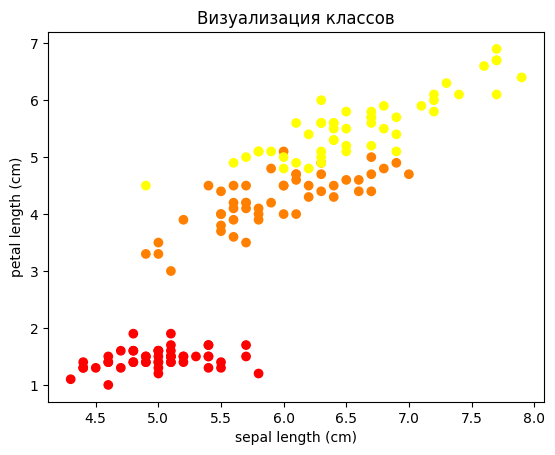

In [6]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

### 2. Проведите минимаксную нормализацию данных.

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

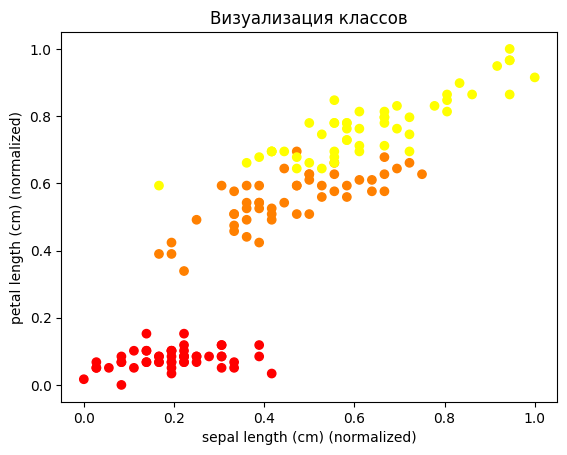

In [9]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm) (normalized)')
plt.ylabel('petal length (cm) (normalized)')
plt.show()

### 3. Посроить модель классификации по методу ближайших соседей с k=3 и оценить эффективность этой модели.

In [10]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred = knn.predict(X_scaled)

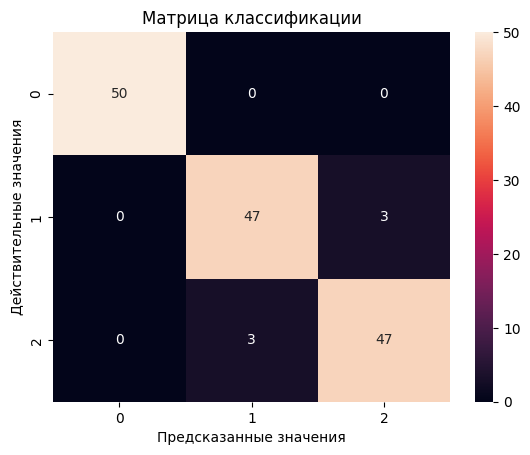

In [13]:
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [14]:
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [15]:
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

In [16]:
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

c:\Users\Polyak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


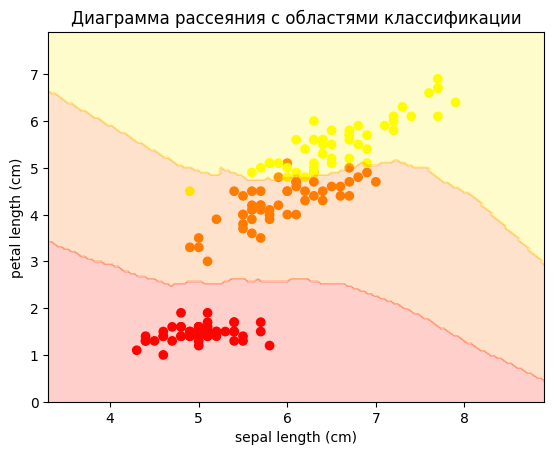

In [17]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

### 4. Создать новое наблюдение, шкалировать его и сделать предсказание на нём. Вывести расстояния до трёх ближайших соседей. Вывести индексы и координаты трёх ближайших соседей. Визуализировать их.

In [18]:
observation_new = [[5.5, 5]]

In [19]:
observation_new_scaled = scaler.transform(observation_new)

c:\Users\Polyak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [20]:
knn.predict(observation_new_scaled)

array([2])

In [21]:
knn.predict_proba(observation_new_scaled)

array([[0., 0., 1.]])

In [22]:
distances, indices = knn.kneighbors(observation_new_scaled)

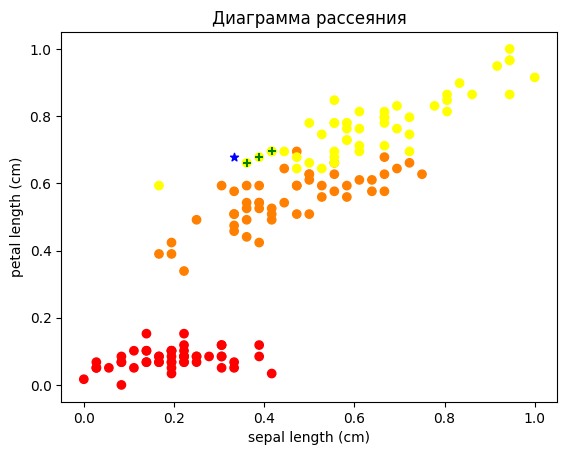

In [23]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

## Задания для самостоятельного выполнения

### 1. Постройте последний график методических указаний в исходном пространстве признаков

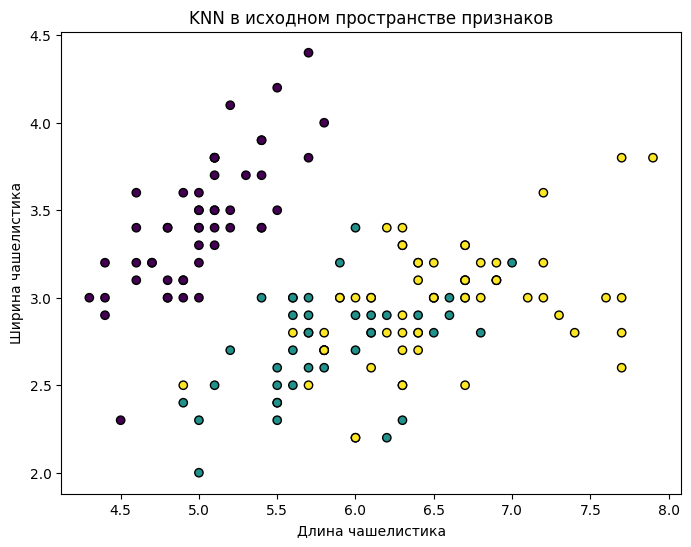

In [24]:
iris = load_iris()
X = iris.data[:, :2] 
y = iris.target
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Длина чашелистика')
plt.ylabel('Ширина чашелистика')
plt.title('KNN в исходном пространстве признаков')
plt.show()

### 2. Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
k_values = [3, 5, 10]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f'Точность при k={k}: {acc:.2f}')

Точность при k=3: 0.85
Точность при k=5: 0.83
Точность при k=10: 0.82


### 3. Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?

In [27]:
new_point = np.array([[10.0, 11.0]])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
new_point_scaled = scaler.transform(new_point)
print(f'Нормализованное значение нового объекта: {new_point_scaled}')
print(f'Нормализованное значение старого объекта: {observation_new_scaled}')


Нормализованное значение нового объекта: [[1.58333333 3.75      ]]
Нормализованное значение старого объекта: [[0.33333333 0.6779661 ]]


### 4. Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.

In [28]:
metrics = ['euclidean', 'manhattan', 'chebyshev']
for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f'Метрика {metric}: точность = {acc:.2f}')

Метрика euclidean: точность = 0.85
Метрика manhattan: точность = 0.85
Метрика chebyshev: точность = 0.86


### 5. Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_full = iris.data
y_full = iris.target
X_full_scaled = MinMaxScaler().fit_transform(X_full)
X_train, X_test, y_train, y_test = train_test_split(X_full_scaled, y_full, test_size=0.2, random_state=42)
knn_full = KNeighborsClassifier(n_neighbors=3)
knn_full.fit(X_train, y_train)
y_pred_full = knn_full.predict(X_test)
print('accuracy ', accuracy_score(y_test, y_pred_full))

accuracy  1.0


### 6. Попробуйте в модели на полном датасете взвешенный алгоритм (аргумент weights объекта KNeighborsClassifier). Сравние его точность с равномерным вариантом.

In [31]:
knn_weighted = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_weighted.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [32]:
y_pred_weighted = knn_weighted.predict(X_test)

In [33]:
print(f'accuracy с взвешенными соседями: {accuracy_score(y_test, y_pred_weighted):.2f}')

accuracy с взвешенными соседями: 1.00


### 7. Постройте график точности (accuracy) модели в зависимости от значения k. Сделайте вывод.

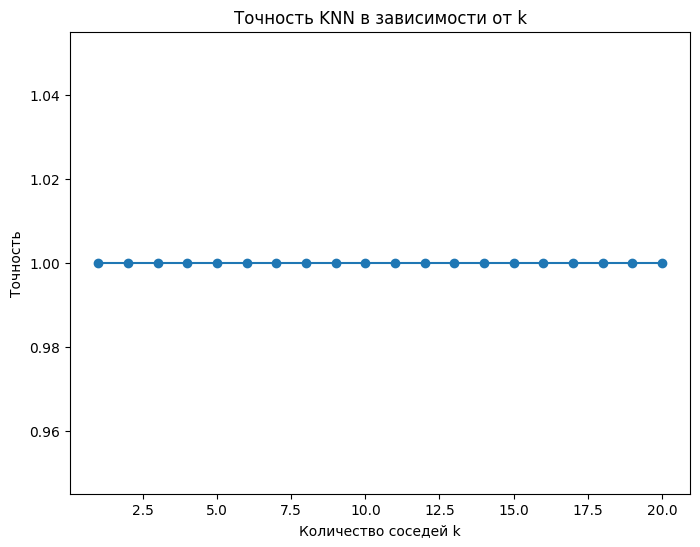

In [34]:
k_range = range(1, 21)
accuracies = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, knn.predict(X_test)))
plt.figure(figsize=(8, 6))
plt.plot(k_range, accuracies, marker='o')
plt.xlabel('Количество соседей k')
plt.ylabel('Точность')
plt.title('Точность KNN в зависимости от k')
plt.show()

### 8. Выберите датасет и постройте регрессию при помощи метода ближайших соседей.

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

In [36]:
data = fetch_california_housing()
X_reg = data.data
y_reg = data.target
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = knn_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f'MSE KNN-регрессии: {mse:.2f}')

MSE KNN-регрессии: 1.12
